In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.neighbors import KNeighborsClassifier as KNeigh

## Ex. 2.8

In [2]:
class learning:
    def __init__(self,pair):
        self.pair=pair
        self.X0,self.y0=self.__datappc('./data/zip.train')
        self.X1,self.y1=self.__datappc('./data/zip.test')
        
    def __datappc(self,path):
        data=np.loadtxt(path)
        mask=np.in1d(data[:,0],self.pair)
        X=data[mask,1: ]
        y=data[mask,0]
        return X,y
    
    def regression(self):
        self.Rerr=np.zeros(2)
        fit=LinReg().fit(self.X0,self.y0)
        predict=lambda X: np.min(self.pair)+np.abs(self.pair[1]-self.pair[0])*(fit.predict(X)>=np.mean(self.pair))
        y0h=predict(self.X0)
        y1h=predict(self.X1)
        self.Rerr[0]=np.mean(y0h!=self.y0)
        self.Rerr[1]=np.mean(y1h!=self.y1)
        
    def kneighbors(self,K):
        self.K=K
        self.Kerr=np.zeros([len(K),2])
        for i,k in enumerate(K):
            fit=KNeigh(n_neighbors=k).fit(self.X0,self.y0)
            y0h=fit.predict(self.X0)
            y1h=fit.predict(self.X1)
            self.Kerr[i,0]=np.mean(y0h!=self.y0)
            self.Kerr[i,1]=np.mean(y1h!=self.y1)
        
    def drawRK(self):
        Rdf=self.X0.shape[1]+1
        Kdf=self.X0.shape[0]/np.array(self.K)
        fig,ax=plt.subplots(figsize=(7,4))
        ax.plot(Rdf,self.Rerr[0],'or',label='linear regression (train)')
        ax.plot(Rdf,self.Rerr[1],'ob',label='linear regression (test)')
        ax.plot(Kdf,self.Kerr[:,0],'r',label='k-nearest neighbor (train)')
        ax.plot(Kdf,self.Kerr[:,0],'xr')
        ax.plot(Kdf,self.Kerr[:,1],'b',label='k-nearest neighbor (test)')
        ax.plot(Kdf,self.Kerr[:,1],'xb')
        ax.set_xlabel('degrees of freedom')
        ax.set_ylabel('error rate')
        ax.set_title('{} vs {}'.format(pair[0],pair[1]))
        ax.legend()
        plt.show()

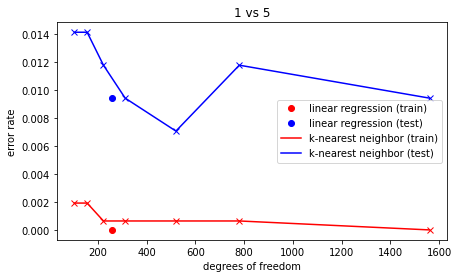

In [3]:
pair=np.random.choice(np.arange(10),2,replace=False)
ln=learning(pair)
ln.regression()
ln.kneighbors([1,2,3,5,7,10,15])
ln.drawRK()